In [ ]:
%pip install imblearn
%pip install seaborn

In [12]:

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans
data = pd.read_csv("학생건강검사_2022년_원자료(극단치제거).csv")


/tmp/ipykernel_2076/2913699671.py:9: DtypeWarning: Columns (43,46,49) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("학생건강검사_2022년_원자료(극단치제거).csv")


Text(0.5, 1.0, 'Top genres')

/home/codespace/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from current font.
  func(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  func(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


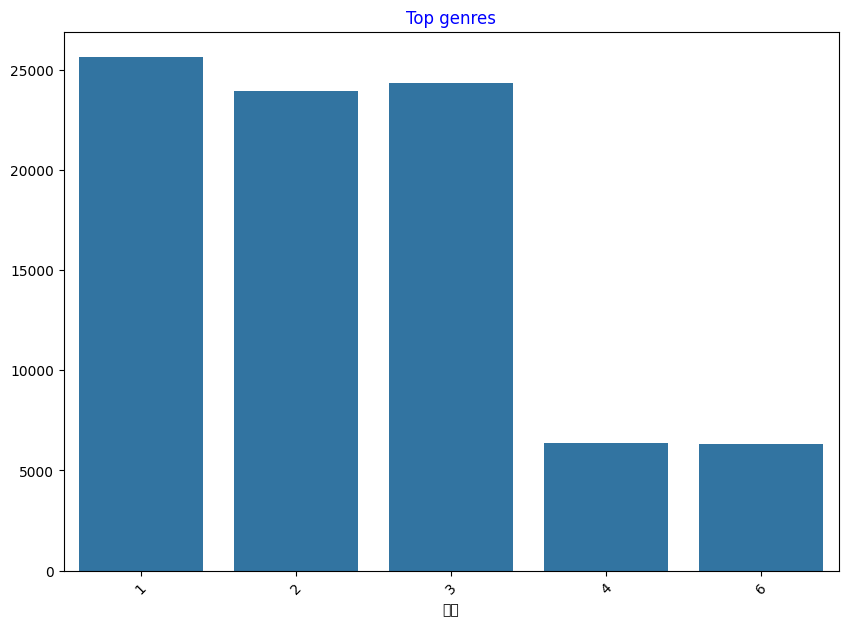

In [13]:
import seaborn as sns

top = data['학년'].value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=top[:5].index,y=top[:5].values)
plt.xticks(rotation=45)
plt.title('Top genres',color = 'blue')


In [ ]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# CSV 파일 로드
data = pd.read_csv("학생건강검사_2022년_원자료(극단치제거).csv")

# 혼합된 데이터 형식을 가지고 있는 열 제거
mixed_type_columns = [43, 46, 49]  # 혼합된 데이터 형식을 가지고 있는 열의 인덱스
data.drop(data.columns[mixed_type_columns], axis=1, inplace=True)

# 누락된 값을 처리
cleaned_data = data.dropna()

# 전처리된 데이터를 새로운 파일로 저장 (선택사항)
cleaned_data.to_csv("preprocessed_data.csv", index=False)

# 클러스터링에 사용할 특성 선택
features = cleaned_data[['시도','학교급','학년','반','순번','성별']]

# 특성 정규화
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# DBSCAN 클러스터링 모델 정의
dbscan = DBSCAN(eps=0.5, min_samples=6)  

# 모델 피팅
dbscan.fit(features_scaled)

# 클러스터 할당 확인
clusters = dbscan.labels_

# 클러스터 결과를 원본 데이터에 추가
cleaned_data['Cluster'] = clusters

# 클러스터 결과 출력
print(cleaned_data[['학년', '반', '성별', 'Cluster']])
